# Logistic Regression

# Assignment 2

In [126]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython import display
from pandas.tools.plotting import scatter_matrix
import scipy as sp

In [127]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [65]:
# Read in exam data
data = pd.read_csv('Exercises_2/ex2/ex2data1.txt', header=None, names=['Exam1', 'Exam2', 'Admitted'])

In [66]:
# Let's add in x_0 to make linear algebra possible. (X*Theta)
data.insert(0, 'x_0', value=np.ones([len(data),1]))

In [67]:
data.head()

,x_0,Exam1,Exam2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


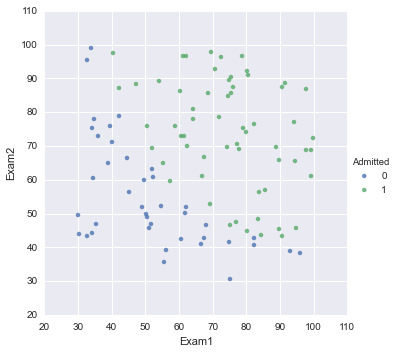

In [226]:
# Let's plot the data, labelleling which students were / were not admitted.
sns.lmplot(x='Exam1', y='Exam2', data=data, hue='Admitted', fit_reg=False);

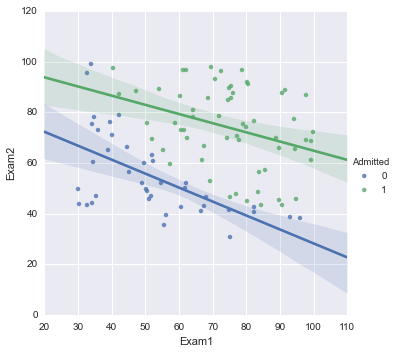

In [230]:
# Seaborn is great and we can plot it with regression fits to our differently labelled data.
# This emphasizes the separation between the two sets of data (although it will not often be this linear)
sns.lmplot(x='Exam1', y='Exam2', data=data, hue='Admitted', fit_reg=True);


In [70]:
# Now let's define the sigmoid function g(z) = 1 / (1+e^(-z)) so we can use it in our hypothesis.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

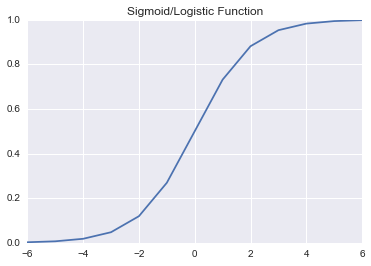

In [128]:
# Because plots are great, let's plot the sigmoid function.
# This shows us that if H(x) > 0, y->1.  H(x) < 0, y->0.
x = [i for i in xrange(-6, 7)]
y = [sigmoid(i) for i in xrange(-6,7)]
plt.title('Sigmoid/Logistic Function')
plt.plot(x,y);

In [129]:
# Test our function.  "Large" x should give values close to 1, small values close to 0. g(0) = 0.5
print 'Sigmoid  0: %s' % sigmoid(0) 
print 'Sigmoid  1: %.2f' % sigmoid(1)
print 'Sigmoid -1: %.2f' % sigmoid(-1)
print 'Sigmoid 10: %.5f' % sigmoid(10)

Sigmoid  0: 0.5
Sigmoid  1: 0.73
Sigmoid -1: 0.27
Sigmoid 10: 0.99995


In [130]:
# Our code even works with matrices! How cool.
a = np.array([[0,1], [-1,10]])
print a
sigmoid(a)

[[ 0  1]
 [-1 10]]


array([[ 0.5       ,  0.73105858],
       [ 0.26894142,  0.9999546 ]])

In [211]:
# Implement CostFunction
def cost_function(theta, X, Y):
    g_xo = sigmoid(np.dot(X, theta))
    p1 = np.dot(np.log(g_xo).T, Y)
    p2 = np.dot(np.log(1-g_xo).T, (1-Y))
    return float((-1.0/(len(X))) * (p1 + p2))
    

In [212]:
# A. Ng says we should get a value of .693 if we were starting with a theta initialized at zero.
X = np.array(data.drop('Admitted', 1))
Y = np.array([data['Admitted']]).T
theta = np.array([[0,0,0]]).T
print 'Cost_Fn should return 0.693, and we get: %.3f' % cost_function(theta, X, Y)

Cost_Fn should return 0.693, and we get: 0.693


In [213]:
# Now we'll try and optimize our parameters.
sp.optimize.minimize(cost_function, theta, args=(X, Y), method = 'Nelder-Mead')

  status: 0
    nfev: 287
 success: True
     fun: 0.20349770159021513
       x: array([-25.16130062,   0.20623142,   0.20147143])
 message: 'Optimization terminated successfully.'
     nit: 157

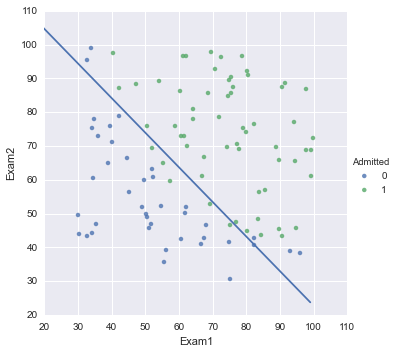

In [239]:
# Now that we've optimized for our theta parameters, we can draw the boundary line.  
# This is not as intuitive as it may appear since we now have 3 values for both theta and x.
# We know that when Theta*X = 0 we get 0.5 which defines the boundary line.  So:
# 0 = -25.16(x0) + .206(x1) + .201(x2).  Since we want to solve for a line, we'll solve for x2.
# x2 = (-25.16(x0) + .206(x1)) / .201
# x2 = (-25.16 / .201) + (.206 / .201)(x1)
# x2 = mx + b = -1.025x + 125.17
y = [x*-1.025 + 125.17 for x in xrange(100)]
x = [x for x in xrange(100)]
g = sns.lmplot(x='Exam1', y='Exam2', data=data, hue='Admitted', fit_reg=False)
plt.xlim([20,110])
plt.ylim([20,110])
plt.plot(x,y);

In [246]:
# A. Ng says the probability of a student passing with an Exam1 of 45 and an Exam2 of 85 is .776
# H(x) = g(Theta*X) = sigmoid(Theta*X)
print 'Student should have a 78% chance of passing. We get {}'.format(sigmoid(-25.1613 + 45*.20623 + 85*.20147))

Student should have a 78% chance of passing. We get 0.776259504629


In [288]:
def predict(X, Y, theta):
    guesses = 0
    for i in xrange(len(X)):
        row = np.array([X[i]])
        if sigmoid(np.dot(row, theta)) >= 0.5:
            if Y[i] == 1:
                guesses += 1
        else:
            if Y[i] == 0:
                guesses += 1
    return guesses*1.0 / len(X)

In [289]:
theta = np.array([[-25.1613, .20623, .20147]]).T # From optimization
print 'Our ability to predict samples is: {}%'.format(predict(X, Y, theta)*100)

Our ability to predict samples is: 89.0%
